## Broad Data Clean & Ensuring reproducibility of the report

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file from the given path
file_path = r"../data/raw/Auto_Theft_Open_Data.csv"
auto_df = pd.read_csv(file_path)

# Print the DataFrame
print(auto_df.columns)

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE',
       'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
       'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW',
       'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE',
       'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')


In [27]:
# Display the first few rows of the dataset
#print(auto_df.head())

# Get summary statistics
print(auto_df.describe())


                  X             Y      OBJECTID   REPORT_YEAR    REPORT_DAY  \
count  6.363300e+04  6.363300e+04  63633.000000  63633.000000  63633.000000   
mean  -8.742175e+06  5.361075e+06  31817.000000   2020.092091     15.658966   
std    9.326877e+05  5.719657e+05  18369.409177      2.965559      8.707062   
min   -8.865400e+06  5.664924e-09      1.000000   2014.000000      1.000000   
25%   -8.852227e+06  5.415842e+06  15909.000000   2018.000000      8.000000   
50%   -8.842266e+06  5.422201e+06  31817.000000   2021.000000     16.000000   
75%   -8.831433e+06  5.428196e+06  47725.000000   2023.000000     23.000000   
max    6.327780e-09  5.442747e+06  63633.000000   2024.000000     31.000000   

         REPORT_DOY   REPORT_HOUR      OCC_YEAR       OCC_DAY       OCC_DOY  \
count  63633.000000  63633.000000  63629.000000  63629.000000  63629.000000   
mean     182.295476     11.414848   2020.078046     15.568640    182.058998   
std      105.017215      5.478690      2.975800    

In [28]:
# Check for missing values
print(auto_df.isnull().sum())

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             4
OCC_MONTH            4
OCC_DAY              4
OCC_DOY              4
OCC_DOW              4
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64


In [29]:
# Example: Drop rows with missing values
auto_df = auto_df.dropna()
# Check for missing values
print(auto_df.isnull().sum())

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64


In [30]:
print(auto_df.head())

              X             Y  OBJECTID EVENT_UNIQUE_ID  \
0 -8.828387e+06  5.424471e+06         1  GO-20141263217   
1 -8.820524e+06  5.422495e+06         2  GO-20141262914   
2 -8.853205e+06  5.406668e+06         3  GO-20141262837   
3 -8.829171e+06  5.417301e+06         4  GO-20141266240   
4 -8.824733e+06  5.436635e+06         5  GO-20141266097   

              REPORT_DATE                OCC_DATE  REPORT_YEAR REPORT_MONTH  \
0  2014/01/01 05:00:00+00  2013/12/31 05:00:00+00         2014      January   
1  2014/01/01 05:00:00+00  2014/01/01 05:00:00+00         2014      January   
2  2014/01/01 05:00:00+00  2013/12/25 05:00:00+00         2014      January   
3  2014/01/02 05:00:00+00  2014/01/02 05:00:00+00         2014      January   
4  2014/01/02 05:00:00+00  2014/01/02 05:00:00+00         2014      January   

   REPORT_DAY  REPORT_DOY  ... UCR_CODE  UCR_EXT                 OFFENCE  \
0           1           1  ...     2135      210  Theft Of Motor Vehicle   
1           1     

In [31]:
# Explore values in columns with ambiguous meaning
LOCATION_TYPE = auto_df['LOCATION_TYPE'].unique()
PREMISES_TYPE_Unique = auto_df['PREMISES_TYPE'].unique()
OFFENCE_unique = auto_df['OFFENCE'].unique()
MCI_CATEGORY_unique = auto_df['MCI_CATEGORY'].unique()


print(f"list of unique types of location values", sorted(LOCATION_TYPE)) # Eliminate Column
print(f"list of unique types of premises values", sorted(PREMISES_TYPE_Unique)) # Keep Column
print(f"list of unique type of offence values", (OFFENCE_unique)) # Eliminate Column
print(f"list of unique MCI_CATEGORY values", (MCI_CATEGORY_unique)) # Eliminate Column 
# all report related items will also be eliminated
# will keep only the new neighborhood structure "NEIGHBOURHOOD_158"

list of unique types of location values ['Apartment (Rooming House, Condo)', 'Bank And Other Financial Institutions (Money Mart, Tsx)', 'Bar / Restaurant', 'Cargo Train', 'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)', 'Community Group Home', 'Construction Site (Warehouse, Trailer, Shed)', 'Convenience Stores', 'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)', 'Gas Station (Self, Full, Attached Convenience)', 'Go Station', 'Go Train', 'Group Homes (Non-Profit, Halfway House, Social Agency)', 'Homeless Shelter / Mission', 'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)', 'Nursing Home', 'Open Areas (Lakes, Parks, Rivers)', 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg', "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)", 'Other Passenger Train Station', 'Other Train Tracks', 'Other Train Yard', 'Parking Lots (Apt., Commercial Or Non-Commercial)', 'Pharmacy', 'Police / Courts (Parole Board, P

In [32]:
OCC_MONTH_unique = auto_df['OCC_MONTH'].unique()
print(f"list of unique months value",(OCC_MONTH_unique))

list of unique months value ['December' 'January' 'November' 'October' 'August' 'February' 'April'
 'March' 'September' 'July' 'May' 'June']


In [33]:
# The columns identified below are not necessary for our analysis and will be dropped from the dataframe
auto_df_dropped = auto_df.drop(columns=['X', 'Y', 'OBJECTID', 'OCC_DATE', 'REPORT_DATE','EVENT_UNIQUE_ID', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
       'REPORT_HOUR','LOCATION_TYPE', 'UCR_CODE','UCR_EXT', 'OFFENCE', 'MCI_CATEGORY','HOOD_140', 'NEIGHBOURHOOD_140','HOOD_158'])

auto_df = auto_df_dropped

print(auto_df.columns)

Index(['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158', 'LONG_WGS84',
       'LAT_WGS84'],
      dtype='object')


In [34]:
print(auto_df.head())

   OCC_YEAR OCC_MONTH  OCC_DAY  OCC_DOY     OCC_DOW  OCC_HOUR DIVISION  \
0    2013.0  December     31.0    365.0  Tuesday           17      D33   
1    2014.0   January      1.0      1.0  Wednesday         15      D43   
2    2013.0  December     25.0    359.0  Wednesday          0      D22   
3    2014.0   January      2.0      2.0  Thursday           9      D54   
4    2014.0   January      2.0      2.0  Thursday           1      D42   

  PREMISES_TYPE            NEIGHBOURHOOD_158  LONG_WGS84  LAT_WGS84  
0     Apartment        Victoria Village (43)  -79.306754  43.734654  
1       Outside             Cliffcrest (123)  -79.236119  43.721827  
2       Outside  Etobicoke City Centre (159)  -79.529692  43.618988  
3       Outside        Woodbine-Lumsden (60)  -79.313796  43.688101  
4         House        Agincourt North (129)  -79.273925  43.813557  


In [35]:
# Save the DataFrame to a CSV file
auto_df.to_csv('..\data\processed\cleaned_data0.csv', index=False)

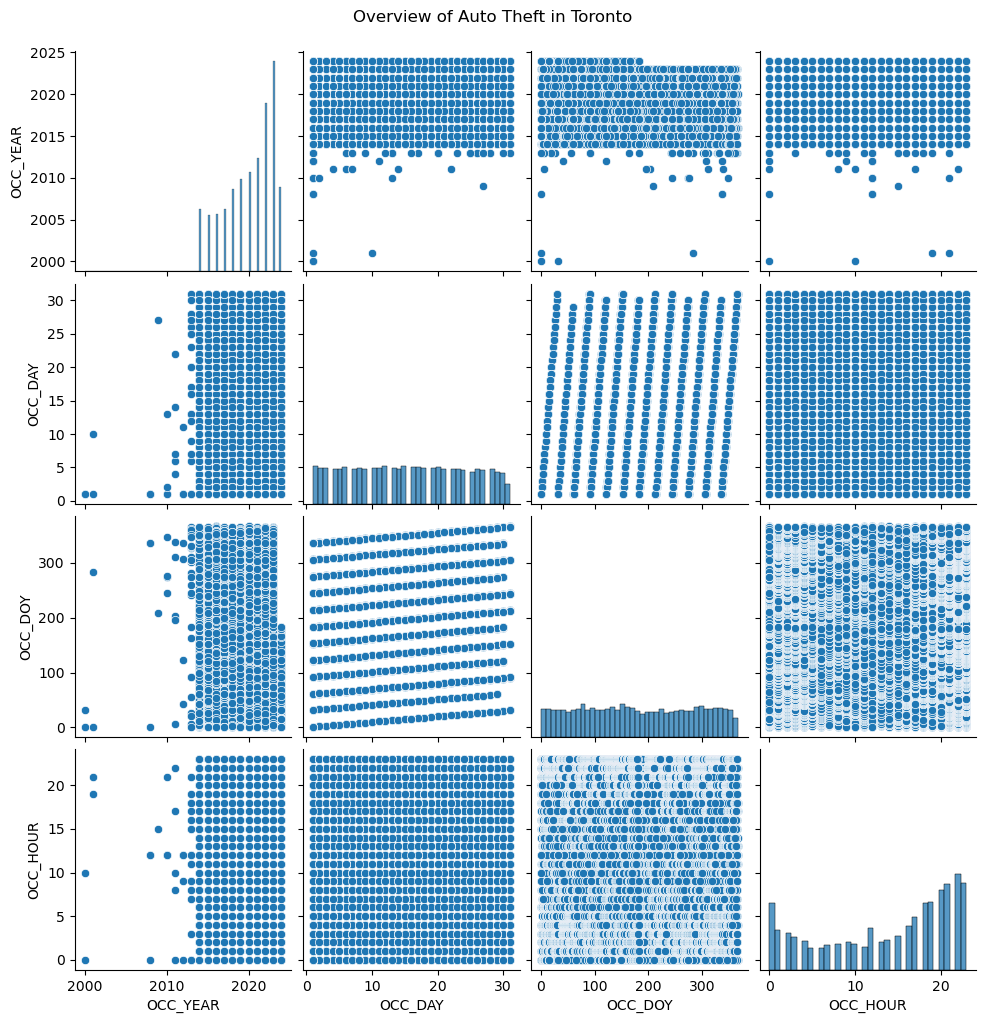

In [36]:
# Filter the necessary columns, including the three additional ones
df_filtered = auto_df[['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158' ]] #Correct column name if needed

# Plotting pairplot to visualize relationships
sns.pairplot(df_filtered)
plt.suptitle('Overview of Auto Theft in Toronto', y=1.02)
plt.show()

In [39]:
# List of categorical columns to encode
categorical_columns = ['OCC_MONTH', 'OCC_DOW', 'DIVISION', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158']

# Apply one-hot encoding
auto_df_encoded = pd.get_dummies(auto_df, columns=categorical_columns)

# Save the DataFrame to a CSV file
auto_df_encoded.to_csv('..\data\processed\cleaned_data1.csv', index=False)

In [38]:
print(auto_df_encoded.head())

   OCC_YEAR  OCC_DAY  OCC_DOY  OCC_HOUR  LONG_WGS84  LAT_WGS84  \
0    2013.0     31.0    365.0        17  -79.306754  43.734654   
1    2014.0      1.0      1.0        15  -79.236119  43.721827   
2    2013.0     25.0    359.0         0  -79.529692  43.618988   
3    2014.0      2.0      2.0         9  -79.313796  43.688101   
4    2014.0      2.0      2.0         1  -79.273925  43.813557   

   OCC_MONTH_April  OCC_MONTH_August  OCC_MONTH_December  OCC_MONTH_February  \
0            False             False                True               False   
1            False             False               False               False   
2            False             False                True               False   
3            False             False               False               False   
4            False             False               False               False   

   ...  NEIGHBOURHOOD_158_Woburn North (142)  \
0  ...                                 False   
1  ...                    